# Input loading

## total + pacu

In [1]:
import pandas as pd


print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = '../DL_model/dataset/preprocess4/input2/'
x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
x_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']

y_train = np.load(input_path+'y_train.npz')['arr_0']
y_test = np.load(input_path+'y_test.npz')['arr_0']
y_val = np.load(input_path+'y_val.npz')['arr_0']
print('done', flush=True)


# pacu
train_pacu = 63526
val_pacu = 6724
test_pacu = 7497
x_train_pacu = x_train[:train_pacu,:,:]
x_val_pacu = x_val[:val_pacu,:,:]
x_test_pacu = x_test[:test_pacu,:,:]

y_train_pacu = y_train[:train_pacu]
y_val_pacu = y_val[:val_pacu]
y_test_pacu = y_test[:test_pacu]

y_train_preop = y_train[train_pacu:]
y_val_preop = y_val[val_pacu:]
y_test_preop = y_test[test_pacu:]


print('x_train shape:', x_train.shape)
print('x_val.shape:', x_val.shape)
print('x_test.shape:', x_test.shape)
print('x_test pacu.shape:', x_test_pacu.shape)

loading train...done
x_train shape: (74636, 5000, 2)
x_val.shape: (7955, 5000, 2)
x_test.shape: (8795, 5000, 2)
x_test pacu.shape: (7497, 5000, 2)


In [2]:
# train: age+gender
age_train = np.load(input_path+'age_train.npz', allow_pickle=True)['arr_0']
gender_train = np.load(input_path+'gender_train.npz', allow_pickle=True)['arr_0']
agender_train = np.array([[age_train[i], gender_train[i]] for i in range(len(age_train))])

# val: age+gender
age_val = np.load(input_path+'age_val.npz', allow_pickle=True)['arr_0']
gender_val = np.load(input_path+'gender_val.npz', allow_pickle=True)['arr_0']
agender_val = np.array([[age_val[i], gender_val[i]] for i in range(len(age_val))])

# test: age+gender
age_test = np.load(input_path+'age_test.npz', allow_pickle=True)['arr_0']
gender_test = np.load(input_path+'gender_test.npz', allow_pickle=True)['arr_0']
agender_test = np.array([[age_test[i], gender_test[i]] for i in range(len(age_test))])

In [4]:
# binary classification
y_train_bin = y_train >= 4
y_test_bin = y_test >= 4
y_val_bin = y_val >= 4

y_train_pacu_bin = y_train_pacu >= 4
y_test_pacu_bin = y_test_pacu >= 4
y_val_pacu_bin = y_val_pacu >= 4

## sample weight

### pacu

In [3]:
# 3 class에 대한 sample weight
train_pacu_w_samp3 = np.ones(shape=(len(y_train_pacu),))

train_pacu_w_samp3[y_train_pacu<4]= len(y_train_pacu)/np.sum(y_train_pacu<4)
train_pacu_w_samp3[(4<=y_train_pacu)&(y_train_pacu<7)]= len(y_train_pacu)/np.sum((4<=y_train_pacu)&(y_train_pacu<7))
train_pacu_w_samp3[7<=y_train_pacu]= len(y_train_pacu)/np.sum(7<=y_train_pacu)

print('train_pacu set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\n'
      .format(len(y_train_pacu)/np.sum(y_train_pacu<4),len(y_train_pacu)/np.sum((4<=y_train_pacu)&(y_train_pacu<7)),len(y_train_pacu)/np.sum(7<=y_train_pacu)))


val_pacu_w_samp3 = np.ones(shape=(len(y_val_pacu),))

val_pacu_w_samp3[y_val_pacu<4]= len(y_val_pacu)/np.sum(y_val_pacu<4)
val_pacu_w_samp3[(4<=y_val_pacu)&(y_val_pacu<7)]= len(y_val_pacu)/np.sum((4<=y_val_pacu)&(y_val_pacu<7))
val_pacu_w_samp3[7<=y_val_pacu]= len(y_val_pacu)/np.sum(7<=y_val_pacu)

print('val_pacu set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\n'
      .format(len(y_val_pacu)/np.sum(y_val_pacu<4),len(y_val_pacu)/np.sum((4<=y_val_pacu)&(y_val_pacu<7)),len(y_val_pacu)/np.sum(7<=y_val_pacu)))


test_pacu_w_samp3 = np.ones(shape=(len(y_test_pacu),))

test_pacu_w_samp3[y_test_pacu<4]= len(y_test_pacu)/np.sum(y_test_pacu<4)
test_pacu_w_samp3[(4<=y_test_pacu)&(y_test_pacu<7)]= len(y_test_pacu)/np.sum((4<=y_test_pacu)&(y_test_pacu<7))
test_pacu_w_samp3[7<=y_test_pacu]= len(y_test_pacu)/np.sum(7<=y_test_pacu)

print('test_pacu set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}'
      .format(len(y_test_pacu)/np.sum(y_test_pacu<4),len(y_test_pacu)/np.sum((4<=y_test_pacu)&(y_test_pacu<7)),len(y_test_pacu)/np.sum(7<=y_test_pacu)))


train_pacu set
sample weight for class 1: 4.18, class 2: 1.76, class 3: 5.18

val_pacu set
sample weight for class 1: 3.90, class 2: 1.77, class 3: 5.61

test_pacu set
sample weight for class 1: 3.64, class 2: 1.85, class 3: 5.42


### pacu + preop

In [7]:
# 3 class에 대한 sample weight
train_w_samp3 = np.ones(shape=(len(y_train),))

train_w_samp3[y_train<4]= len(y_train)/np.sum(y_train<4)
train_w_samp3[(4<=y_train)&(y_train<7)]= len(y_train)/np.sum((4<=y_train)&(y_train<7))
train_w_samp3[7<=y_train]= len(y_train)/np.sum(7<=y_train)

print('train set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\m'
      .format(len(y_train)/np.sum(y_train<4),len(y_train)/np.sum((4<=y_train)&(y_train<7)),len(y_train)/np.sum(7<=y_train)))


val_w_samp3 = np.ones(shape=(len(y_val),))

val_w_samp3[y_val<4]= len(y_val)/np.sum(y_val<4)
val_w_samp3[(4<=y_val)&(y_val<7)]= len(y_val)/np.sum((4<=y_val)&(y_val<7))
val_w_samp3[7<=y_val]= len(y_val)/np.sum(7<=y_val)

print('val set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\m'
      .format(len(y_val)/np.sum(y_val<4),len(y_val)/np.sum((4<=y_val)&(y_val<7)),len(y_val)/np.sum(7<=y_val)))


test_w_samp3 = np.ones(shape=(len(y_test),))

test_w_samp3[y_test<4]= len(y_test)/np.sum(y_test<4)
test_w_samp3[(4<=y_test)&(y_test<7)]= len(y_test)/np.sum((4<=y_test)&(y_test<7))
test_w_samp3[7<=y_test]= len(y_test)/np.sum(7<=y_test)

print('test set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}'
      .format(len(y_test)/np.sum(y_test<4),len(y_test)/np.sum((4<=y_test)&(y_test<7)),len(y_test)/np.sum(7<=y_test)))


train set
sample weight for class 1: 2.84, class 2: 2.07, class 3: 6.08\m
val set
sample weight for class 1: 2.69, class 2: 2.09, class 3: 6.63\m
test set
sample weight for class 1: 2.62, class 2: 2.17, class 3: 6.36


## Customized Confusion matrix

In [5]:
import itertools
import matplotlib.pyplot as plt


def cplot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(3,3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.0f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# GPU setting

In [6]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from 
keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K
from keras import regularizers
from keras.initializers import he_normal, GlorotNormal


import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


4 Physical GPUs, 4 Logical GPUs


In [5]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K
from keras import regularizers
from keras.initializers import he_normal, GlorotNormal
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
        tf.config.experimental.set_virtual_device_configuration(gpus[1], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 4 Logical GPUs


# Model 1 - train, test: pacu+preop

## Model loading

In [6]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/1D_CNN_3layers_sample-weighted_3class_lowess_filtered'
load_path+='/roc0.7725_prc0.8419_batch=512,c1=128,c2=32,c3=0,filt1=3,filt2=3,filt3=0,str1=1,str2=1,str3=0,conv_double=True,globalpool=ave,dropout=0.2,dnodes=0,dropout=0,dnodes=0,dropout=0_acc0.78'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
loaded_model = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
loaded_model.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model Evaluation - Test set

### pacu

#### test set

test set accuracy:0.72
test set auroc: 0.636163,  test set auprc: 0.772085


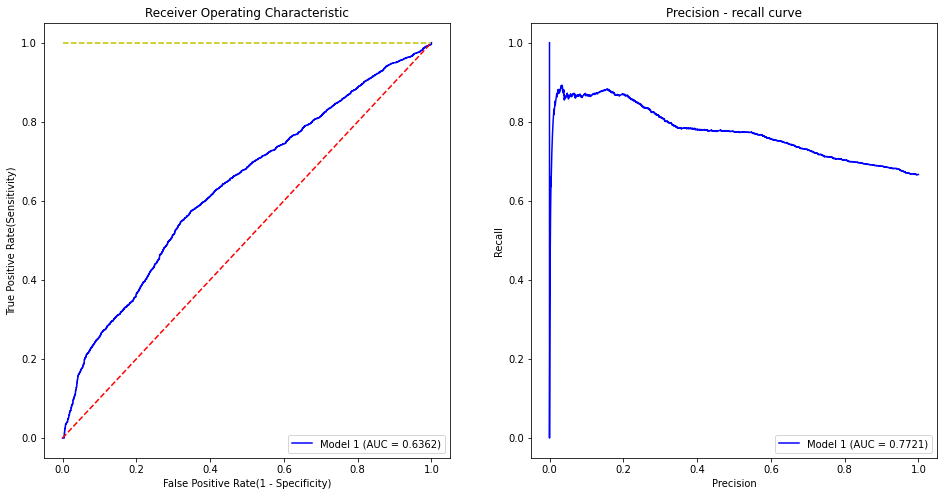

In [53]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_tests = [x_test[:test_pacu,:,1:2], agender_test[:test_pacu]]
y_pred = loaded_model.predict(x_tests).flatten()

### Classification
# Model Accuracy of test set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==y_test_pacu_bin)
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_pacu_bin, y_pred, sample_weight = test_pacu_w_samp3)
precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred, sample_weight = test_pacu_w_samp3)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('test set auroc: {:.6f},  test set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

#### train set

train set accuracy:0.77
train set auroc: 0.672881,  train set auprc: 0.795205


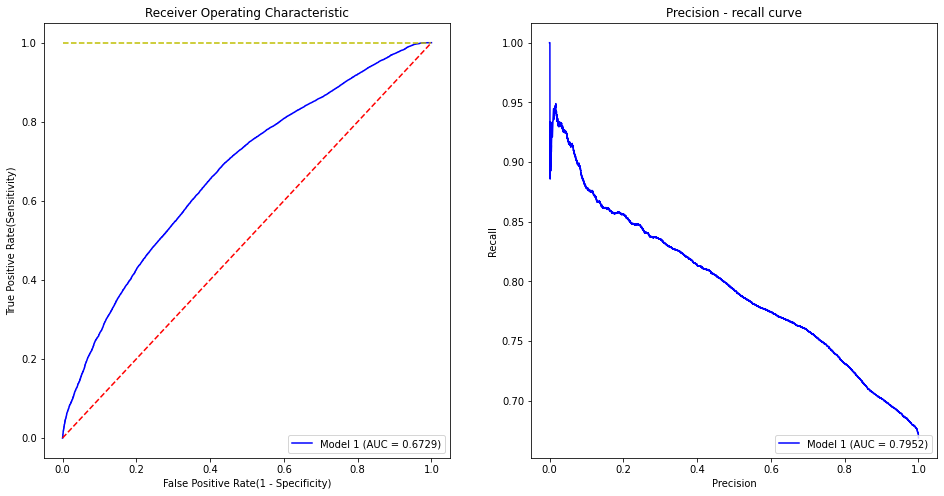

In [100]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_trains = [x_train[:train_pacu,:,1:2], agender_train[:train_pacu]]
y_pred = loaded_model.predict(x_trains).flatten()

### Classification
# Model Accuracy of train set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==y_train_pacu_bin)
print('train set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_train_pacu_bin, y_pred, sample_weight = train_pacu_w_samp3)
precision1, recall1, _ = precision_recall_curve(y_train_pacu_bin, y_pred, sample_weight = train_pacu_w_samp3)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('train set auroc: {:.6f},  train set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

optimal thval: 0.7711851596832275
Confusion matrix, without normalization
[[1400  657]
 [2592 2848]]
Confusion matrix, without normalization
[[5102.48 2394.52]
 [6799.06 8194.94]]


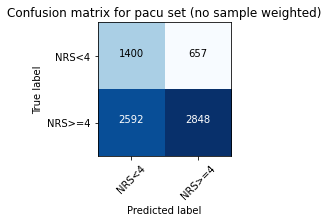

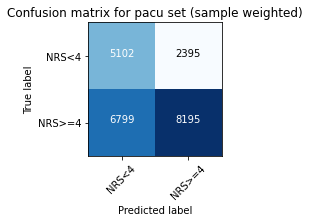

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve


### mooderate pain
y_test1 = y_test_pacu_bin
y_pred1 = y_pred

# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_test1, y_pred1)#, sample_weight = test_pacu_w_samp3)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {}'.format(thval))
                             
#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1>=thval)#, sample_weight = test_pacu_w_samp3)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (no sample weighted)')


# confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1>=thval, sample_weight = test_pacu_w_samp3)

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (sample weighted)')

Confusion matrix, without normalization
[[ 247 1810]
 [ 307 5133]]


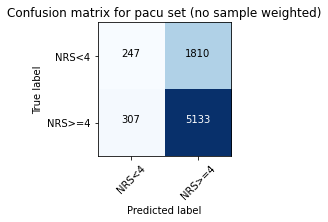

In [54]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1>=0.6)#, sample_weight = test_pacu_w_samp3)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (no sample weighted)')


### preop

test set accuracy:0.95
test set auroc: nan,  test set auprc: nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


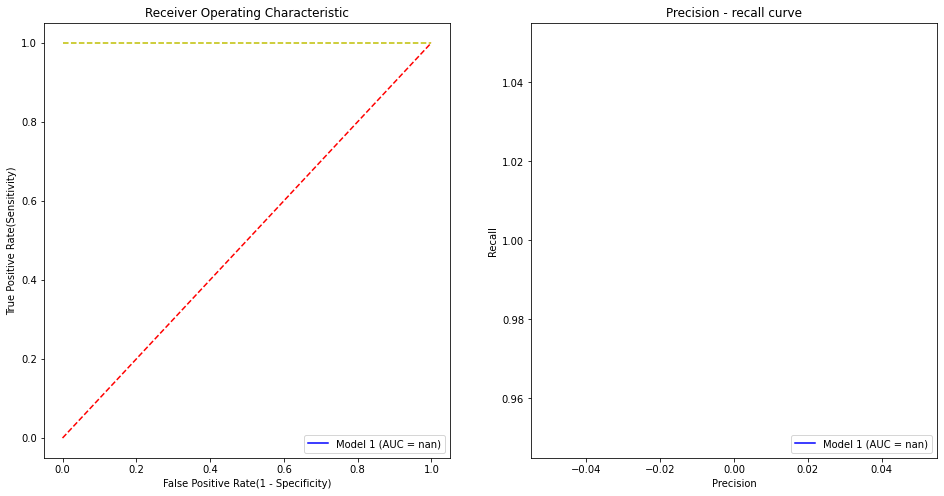

In [55]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_tests = [x_test[test_pacu:,:,1:2], agender_test[test_pacu:]]
y_pred = loaded_model.predict(x_tests).flatten()

### Classification
# Model Accuracy of test set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==np.zeros(len(y_test_preop)))
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(np.zeros(len(y_test_preop)), y_pred)
precision1, recall1, _ = precision_recall_curve(np.zeros(len(y_test_preop)), y_pred)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('test set auroc: {:.6f},  test set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

In [57]:
np.sum(y_pred<0.1) / len(y_pred) * 100

89.90755007704159

optimal thval: 0.5
Confusion matrix, without normalization
[[1229   69]
 [   0    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


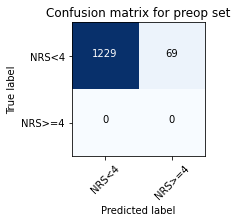

In [48]:
from sklearn.metrics import confusion_matrix, roc_curve


### mooderate pain
y_test2 = np.zeros(len(y_test_preop))
y_pred2 = y_pred

# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_test2, y_pred2)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
thval = 0.5
print('optimal thval: {}'.format(thval))


#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_test2, y_pred2>=thval)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for preop set')

### pacu + preop

###Binary classification trained without sample weight###
test set accuracy:0.75
<sample weighted> test set auroc: 0.7725,  test set auprc: 0.8419
<not weighted> test set auroc: 0.7629,  test set auprc: 0.8019


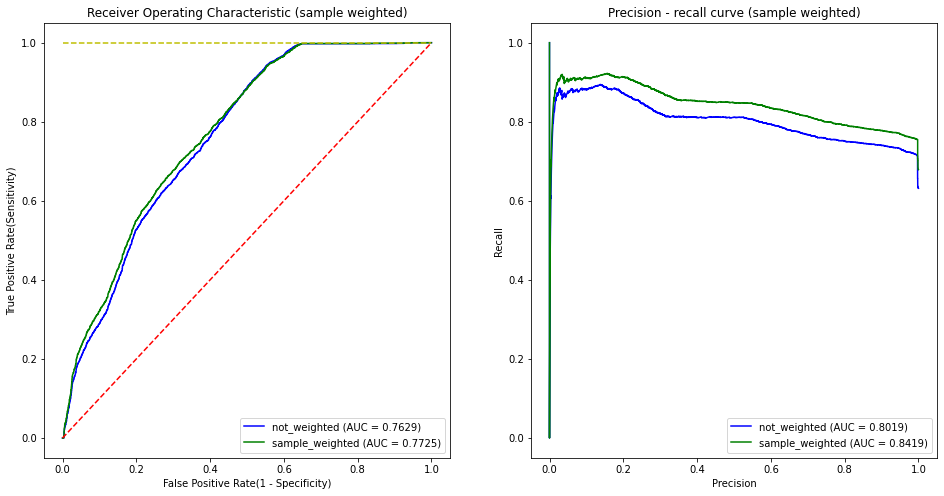

In [113]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt


x_tests = [x_test[:,:,1:2], agender_test[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = loaded_model.predict(x_tests).flatten()
print('###Binary classification trained without sample weight###')

### Classification
# Model Accuracy of test set
model_y = y_pred3>=0.5
acc_val = np.mean(model_y==y_test_bin)
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate3s, true_positive_rate3s, threshold = roc_curve(y_test_bin, y_pred3, sample_weight = test_w_samp3)
precision3s, recall3s, _ = precision_recall_curve(y_test_bin, y_pred3, sample_weight = test_w_samp3)

roc_auc3s = auc(false_positive_rate3s, true_positive_rate3s)
prc_auc3s = auc(recall3s, precision3s)
print('<sample weighted> test set auroc: {:.4f},  test set auprc: {:.4f}'.format(roc_auc3s, prc_auc3s))


test_w_samp2 = np.ones(shape=(len(y_test),))
# Model AUROC, AUPRC
false_positive_rate3, true_positive_rate3, threshold = roc_curve(y_test_bin, y_pred3, sample_weight = test_w_samp2)
precision3, recall3, _ = precision_recall_curve(y_test_bin, y_pred3, sample_weight = test_w_samp2)

roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
prc_auc3 = auc(recall3, precision3)
print('<not weighted> test set auroc: {:.4f},  test set auprc: {:.4f}'.format(roc_auc3, prc_auc3))



# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic (sample weighted)')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate3, true_positive_rate3, 'b', label='not_weighted (AUC = %0.4f)'% roc_auc3)
ax1.plot(false_positive_rate3s, true_positive_rate3s, 'g', label='sample_weighted (AUC = %0.4f)'% roc_auc3s)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve (sample weighted)')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall3, precision3, 'b', label='not_weighted (AUC = %0.4f)'% prc_auc3)
ax2.plot(recall3s, precision3s, 'g', label='sample_weighted (AUC = %0.4f)'% prc_auc3s)
ax2.legend(loc='lower right')
plt.show()

optimal thval: 0.6016923189163208
Confusion matrix, without normalization
[[1502 1853]
 [ 314 5126]]
Confusion matrix, without normalization
[[ 3937.43  4857.57]
 [ 1062.43 16527.57]]


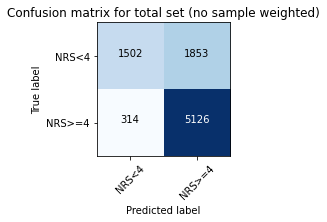

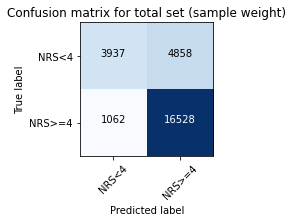

In [52]:
from sklearn.metrics import confusion_matrix, roc_curve


### mooderate pain
y_test3 = y_test_bin


# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_test3, y_pred3)#, sample_weight = test_w_samp3)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {}'.format(thval))
                             
#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_test3, y_pred3>=thval)#, sample_weight = test_w_samp3)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for total set (no sample weighted)')


# sample weighted
cnf_matrix = confusion_matrix(y_test3, y_pred3>=thval, sample_weight = test_w_samp3)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for total set (sample weight)')


## Mutli-class confusion matrix

### test set

<AxesSubplot:title={'center':'CM of test set with model trained with pacu+preop'}, xlabel='Predicted label', ylabel='True label'>

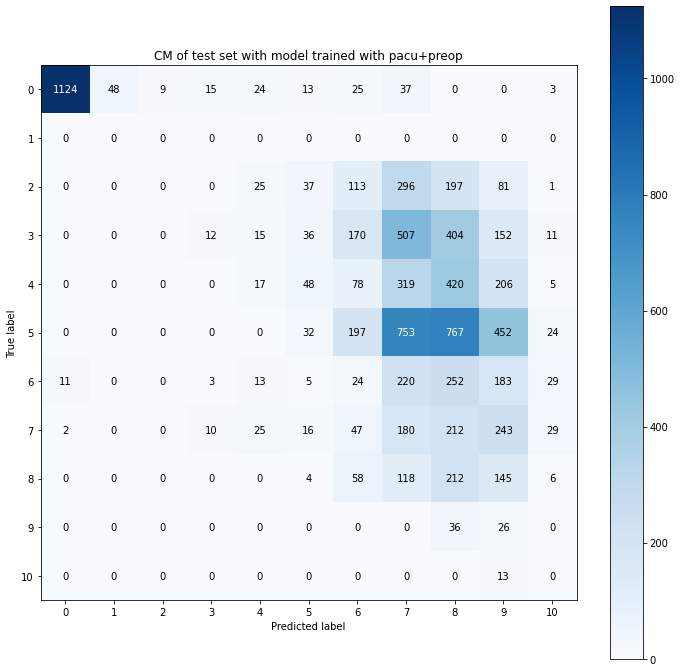

In [103]:
from scikitplot.metrics import plot_confusion_matrix


# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_test_label3 = np.array(y_test)

plot_confusion_matrix(
    y_test_label3, y_pred_label3, title='CM of test set with model trained with pacu+preop',
    figsize=(12,12))

### train set

<AxesSubplot:title={'center':'CM of train set with model trained with pacu+preop'}, xlabel='Predicted label', ylabel='True label'>

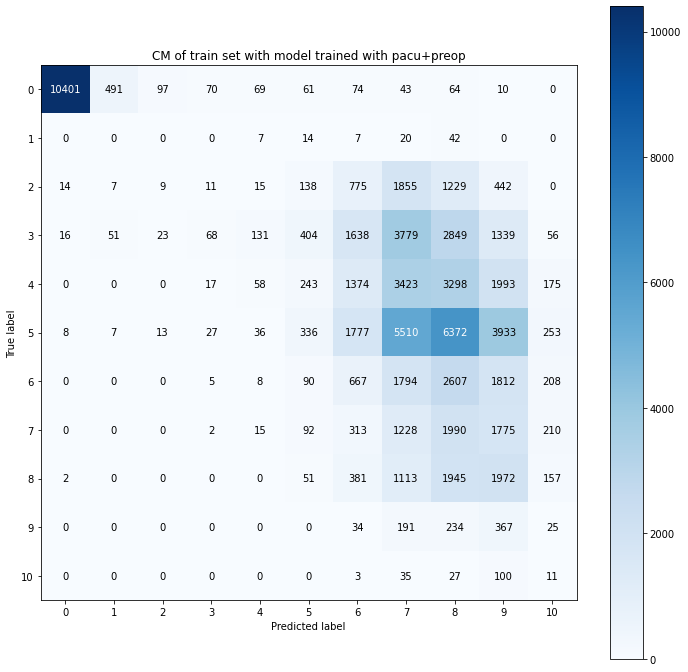

In [115]:
from scikitplot.metrics import plot_confusion_matrix

x_trains = [x_train[:,:,1:2], agender_train[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = loaded_model.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with model trained with pacu+preop',
    figsize=(12,12))

In [117]:
### Classification
# Model Accuracy of test set

model_y = y_pred3>=0.5
acc_val = np.mean(model_y==y_train_bin)
print('train set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate3s, true_positive_rate3s, threshold = roc_curve(y_train_bin, y_pred3, sample_weight = train_w_samp3)
precision3s, recall3s, _ = precision_recall_curve(y_train_bin, y_pred3, sample_weight = train_w_samp3)

roc_auc3s = auc(false_positive_rate3s, true_positive_rate3s)
prc_auc3s = auc(recall3s, precision3s)
print('<sample weighted> train set auroc: {:.4f},  train set auprc: {:.4f}'.format(roc_auc3s, prc_auc3s))

train set accuracy:0.80
<sample weighted> train set auroc: 0.8089,  train set auprc: 0.8680


## Model loading - (val = train)

In [137]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/1D_CNN_3layers_sample-weighted_3class_lowess_filtered_train=val'
load_path+='/train_loss0.5337_roc0.7194_prc0.8044_batch=512,c1=256,c2=128,c3=256,filt1=5,filt2=3,filt3=3,str1=3,str2=1,str3=1,conv_double=True,globalpool=ave,dropout=0.2,dnodes=32,dropout=0.4,dnodes=64,dropout=0.5_acc0.71'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model1_1 = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model1_1.load_weights(load_weight_path)
print('done')


loading model...done
loading weights...done


<AxesSubplot:title={'center':'CM of train set with model trained with pacu+preop (train=val)'}, xlabel='Predicted label', ylabel='True label'>

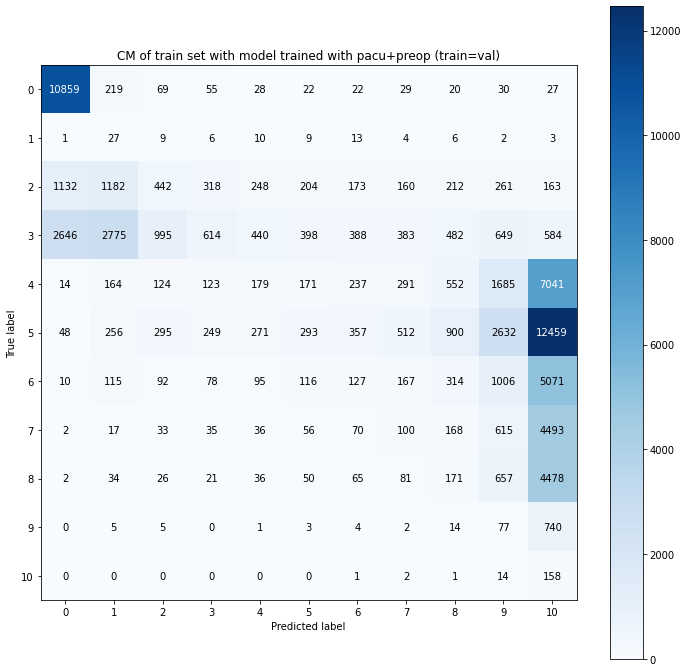

In [138]:
from scikitplot.metrics import plot_confusion_matrix

x_trains = [x_train[:,:,1:2], agender_train[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model1_1.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with model trained with pacu+preop (train=val)',
    figsize=(12,12))

# Model 2 - train: pacu

## Model loading

In [36]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/pacu/NRS>=7/1D_CNN_3layers_train_w_samp3_lowess_filtered'
load_path+='/roc0.6146_prc0.2587_batch=512,c1=32,c2=128,c3=32,filt1=7,filt2=5,filt3=5,str1=1,str2=1,str3=2,conv_double=True,globalpool=ave,dropout=0.3,dnodes=32,dropout=0.2,dnodes=0,dropout=0_acc0.82'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model2 = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model2.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model Evaluation

### pacu

test set accuracy:0.73
test set auroc: 0.631965,  test set auprc: 0.422333


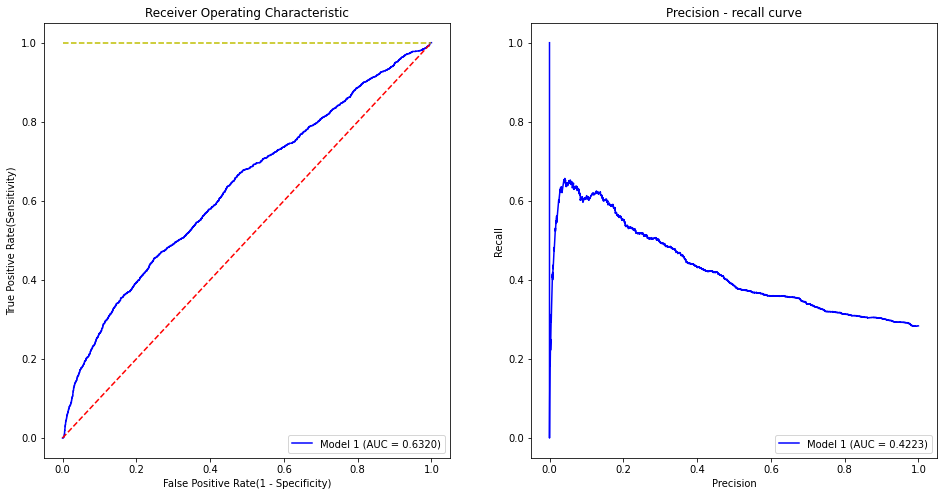

In [34]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_tests = [x_test[:test_pacu,:,1:2], agender_test[:test_pacu]]
y_pred = model2.predict(x_tests).flatten()

y_test_pacu_bin = y_test_pacu>=6
### Classification
# Model Accuracy of test set
model_y = y_pred>=0.6
acc_val = np.mean(model_y==y_test_pacu_bin)
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_pacu_bin, y_pred)#, sample_weight = test_pacu_w_samp3)
precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)#, sample_weight = test_pacu_w_samp3)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('test set auroc: {:.6f},  test set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

optimal thval: 0.4192984104156494
Confusion matrix, without normalization
[[4042 1333]
 [1157  965]]


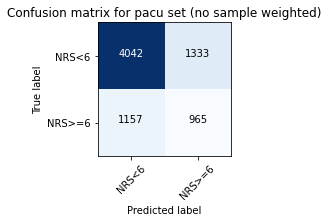

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve


### mooderate pain
y_test1 = y_test_pacu>=6
y_pred1 = y_pred

# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_test1, y_pred1)#, sample_weight = test_pacu_w_samp3)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {}'.format(thval))
                             

# confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1>=thval)#, sample_weight = test_pacu_w_samp3)
np.set_printoptions(precision=2)
class_names = ['NRS<6','NRS>=6']

cplot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (no sample weighted)')

# confusion matrix
#cnf_matrix = confusion_matrix(y_test1, y_pred1>=thval, sample_weight = test_pacu_w_samp3)

#cplot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (sample weighted)')




<AxesSubplot:title={'center':'CM of test set with model trained with pacu only (NRS>=7)'}, xlabel='Predicted label', ylabel='True label'>

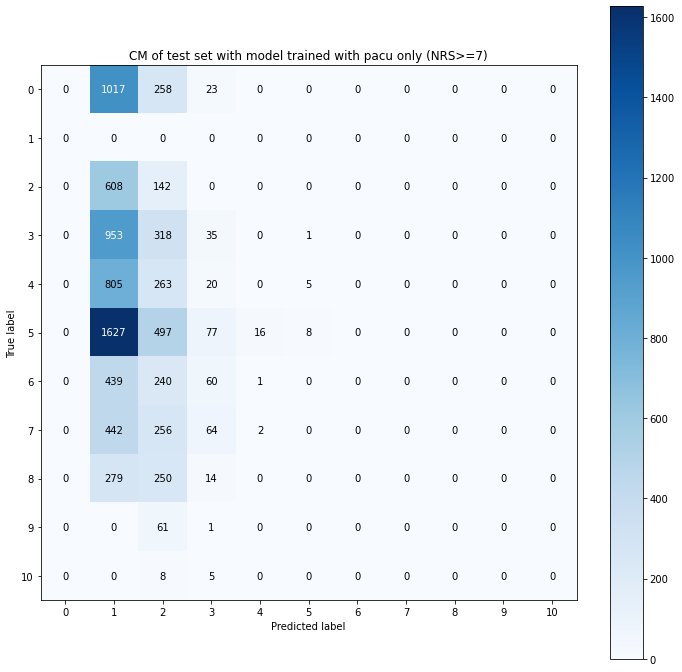

In [37]:
from scikitplot.metrics import plot_confusion_matrix


#x_tests = [x_test[:test_pacu,:,1:2], agender_test[:test_pacu]]
x_tests = [x_test[:,:,1:2], agender_test[:]]
y_pred1 = model2.predict(x_tests).flatten()


# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label2 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred1])
y_test_label2 = np.array(y_test) # np.array(y_test_pacu)

plot_confusion_matrix(
    y_test_label2, y_pred_label2, hide_zeros=False, title='CM of test set with model trained with pacu only (NRS>=7)',
    figsize=(12,12))

<AxesSubplot:title={'center':'CM of train set with model trained with pacu only (NRS>=7)'}, xlabel='Predicted label', ylabel='True label'>

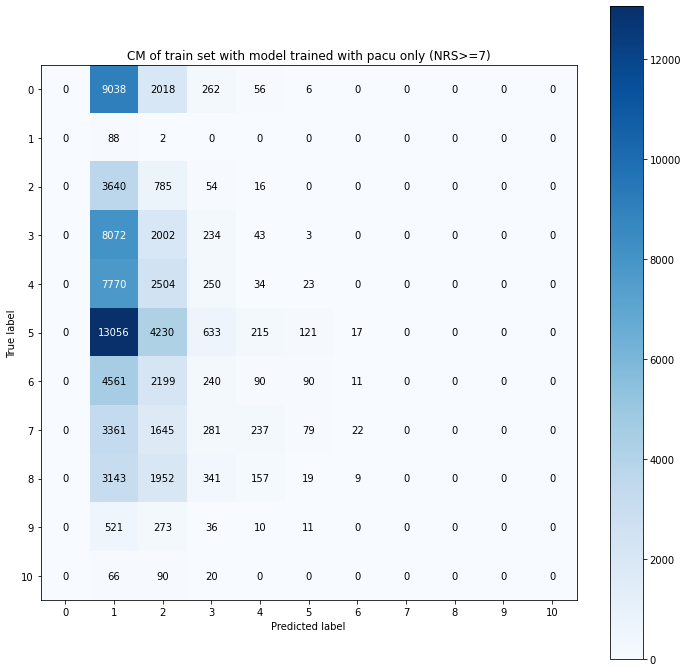

In [38]:
from scikitplot.metrics import plot_confusion_matrix

x_trains = [x_train[:,:,1:2], agender_train[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model2.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with model trained with pacu only (NRS>=7)',
    figsize=(12,12))

In [88]:
from sklearn.metrics import multilabel_confusion_matrix

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label = np.array([labels[int(round(y_pr/0.1))] for y_pr in y_pred1])
y_test_label = np.array([labels[yi] for yi in y_test_pacu])


# confusion matrix
cnf_matrix = multilabel_confusion_matrix(y_test_label, y_pred_label, samplewise=False)#, sample_weight = test_pacu_w_samp3)
np.set_printoptions(precision=2)
class_names = [str(i) for i in range(11)]

#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for pacu set (no sample weighted)')
cnf_matrix

array([[[7497,    0],
        [   0,    0]],

       [[7497,    0],
        [   0,    0]],

       [[6747,    0],
        [ 750,    0]],

       [[6190,    0],
        [1307,    0]],

       [[6404,    0],
        [1093,    0]],

       [[5156,  116],
        [2204,   21]],

       [[5524, 1233],
        [ 643,   97]],

       [[1591, 5142],
        [ 108,  656]],

       [[6753,  201],
        [ 512,   31]],

       [[7435,    0],
        [  62,    0]],

       [[7484,    0],
        [  13,    0]]])

### preop

(array([ 27.,  76.,  41.,  87., 171., 288., 393., 145.,  57.,  13.]),
 array([0.47, 0.5 , 0.54, 0.57, 0.6 , 0.63, 0.66, 0.69, 0.72, 0.75, 0.78],
       dtype=float32),
 <BarContainer object of 10 artists>)

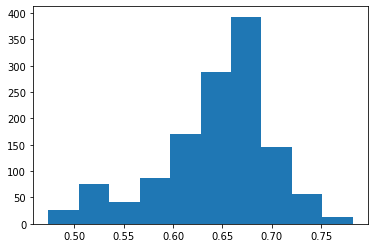

In [64]:
plt.hist(y_pred)

test set accuracy:0.02
test set auroc: nan,  test set auprc: nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


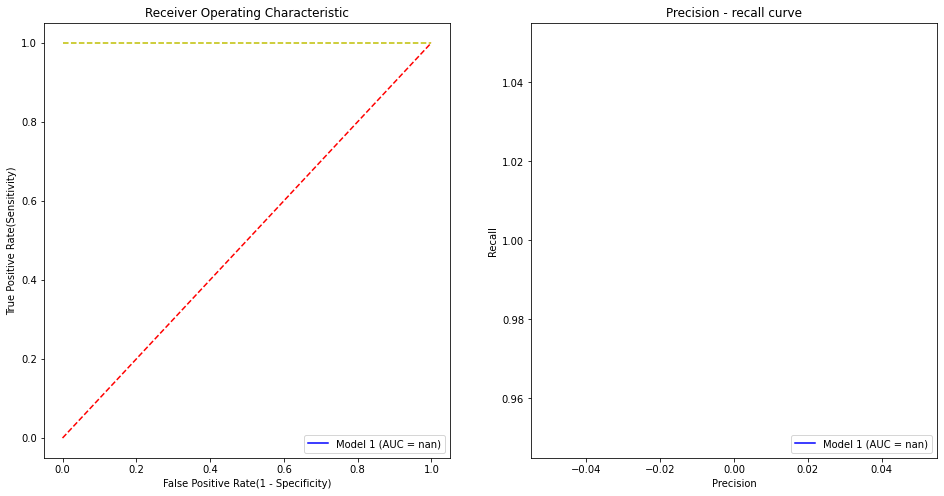

In [61]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_tests = [x_test[test_pacu:,:,1:2], agender_test[test_pacu:]]
y_pred = model2.predict(x_tests).flatten()

### Classification
# Model Accuracy of test set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==np.zeros(len(y_test_preop)))
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(np.zeros(len(y_test_preop)), y_pred)
precision1, recall1, _ = precision_recall_curve(np.zeros(len(y_test_preop)), y_pred)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('test set auroc: {:.6f},  test set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

# Model 3 - train, test: pacu (val = train)

## Model loading

In [131]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/train_val_test_pacu/1D_CNN_3layers_sample-weighted_3class_lowess_filtered_only_train'
load_path+='/train_loss0.1531_roc0.5629_prc0.7146_batch=512,c1=64,c2=32,c3=128,filt1=5,filt2=3,filt3=5,str1=1,str2=2,str3=1,conv_double=True,globalpool=ave,dropout=0.1,dnodes=0,dropout=0,dnodes=0,dropout=0_acc0.62'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model3 = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model3.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model evaluation

### pacu

test set accuracy:0.65
test set auroc: 0.562901,  test set auprc: 0.714645


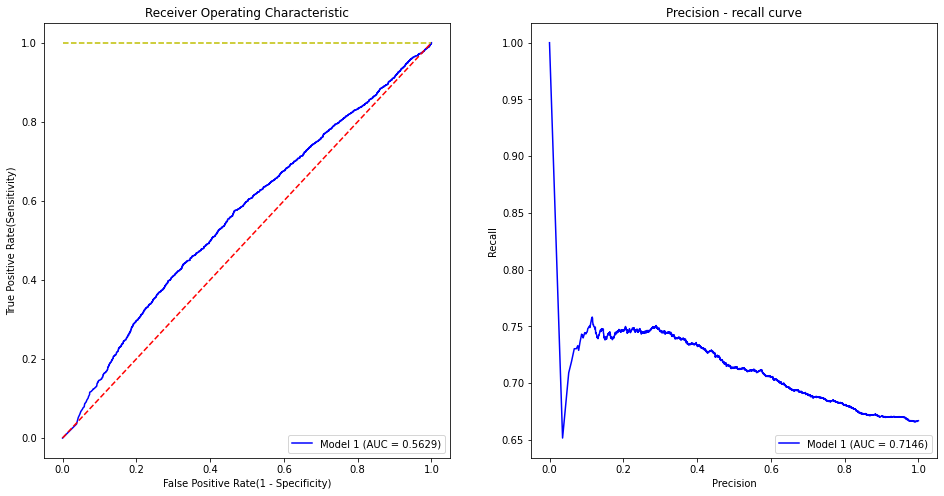

In [132]:
from sklearn.metrics import roc_curve, auc, r2_score, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

x_tests = [x_test[:test_pacu,:,1:2], agender_test[:test_pacu]]
y_pred = model3.predict(x_tests).flatten()

### Classification
# Model Accuracy of test set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==y_test_pacu_bin)
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC, AUPRC
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_pacu_bin, y_pred, sample_weight = test_pacu_w_samp3)
precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred, sample_weight = test_pacu_w_samp3)

roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
prc_auc1 = auc(recall1, precision1)
print('test set auroc: {:.6f},  test set auprc: {:.6f}'.format(roc_auc1, prc_auc1))


# plotting auprc
fig = plt.figure(figsize=(16,8))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')

ax1.plot(false_positive_rate1, true_positive_rate1, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc1)
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.legend(loc='lower right')

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - recall curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall1, precision1, 'b', label='Model 1 (AUC = %0.4f)'% prc_auc1)
ax2.legend(loc='lower right')
plt.show()

#### confusion matrix

<AxesSubplot:title={'center':'CM of train set with model trained with pacu train set only (overfitting)'}, xlabel='Predicted label', ylabel='True label'>

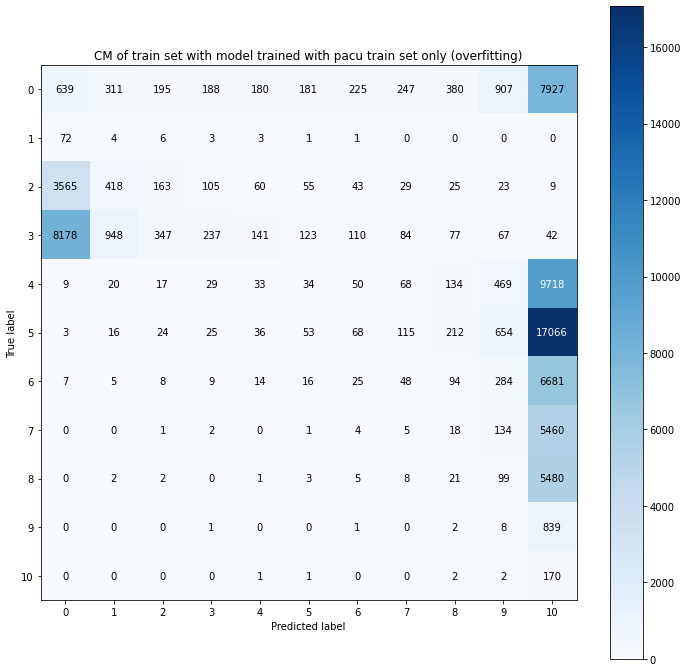

In [140]:
from scikitplot.metrics import plot_confusion_matrix

x_trains = [x_train[:,:,1:2], agender_train[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model3.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with model trained with pacu train set only (overfitting)',
    figsize=(12,12))

<AxesSubplot:title={'center':'CM of test set with model trained with pacu train set only (overfitting)'}, xlabel='Predicted label', ylabel='True label'>

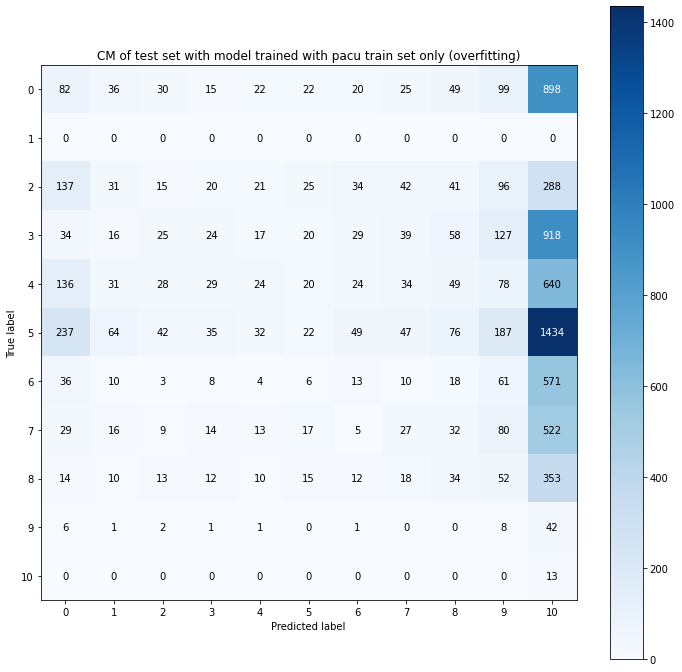

In [139]:
from scikitplot.metrics import plot_confusion_matrix

x_tests = [x_test[:,:,1:2], agender_test[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model3.predict(x_tests).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_test_label3 = np.array(y_test)

plot_confusion_matrix(
    y_test_label3, y_pred_label3, title='CM of test set with model trained with pacu train set only (overfitting)',
    figsize=(12,12))

# Model 4 (regression) - train, val: pacu

## Model loading

In [7]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/pacu/regression/1D_CNN_3layers_train_w_samp3_lowess_filtered'
load_path+='/mae0.1358_auc0.5915_batch=512,c1=256,c2=64,c3=256,filt1=3,filt2=5,filt3=3,str1=1,str2=1,str3=2,conv_double=False,globalpool=max,dropout=0.3,dnodes=32,dropout=0.2,dnodes=16,dropout=0.4'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model4 = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model4.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model evaluation

### train set

In [19]:
min(y_pred3), max(y_pred3)

(0.49271777, 0.5083013)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


<AxesSubplot:title={'center':'CM of train set with reg model trained with pacu set'}, xlabel='Predicted label', ylabel='True label'>

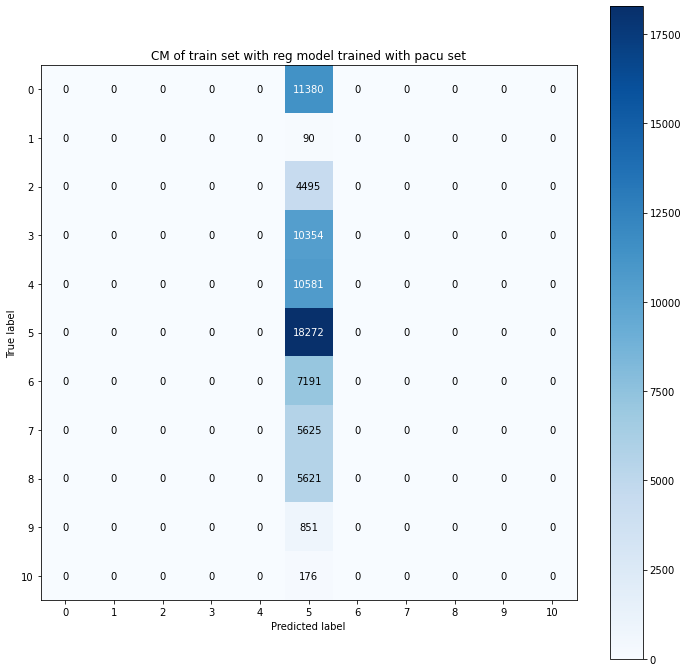

In [17]:
from scikitplot.metrics import plot_confusion_matrix
import tensorflow as tf


x_trains = [x_train[:,:,1:2], agender_train[:]]

# 전체 test 샘플을 한번에 예측
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
with strategy.scope():
    y_pred3 = model4.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with reg model trained with pacu set',
    figsize=(12,12))

### test set

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


<AxesSubplot:title={'center':'CM of test set with reg model trained with pacu set'}, xlabel='Predicted label', ylabel='True label'>

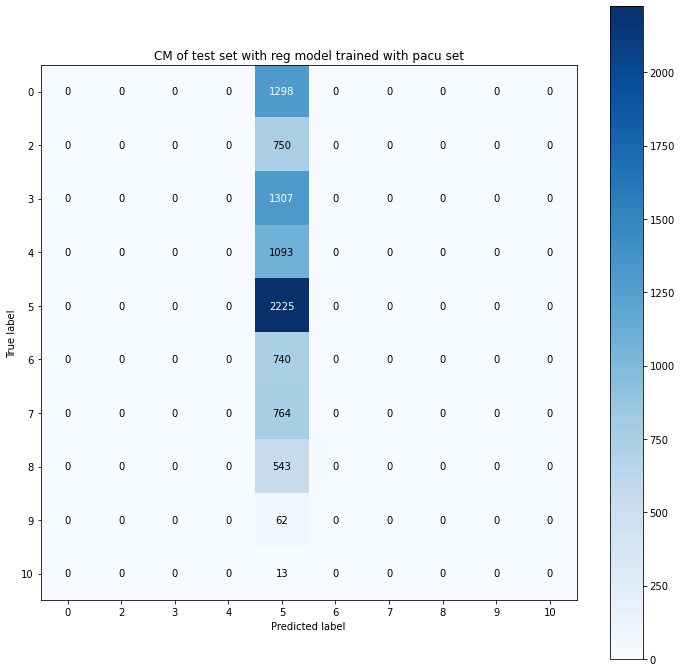

In [20]:
from scikitplot.metrics import plot_confusion_matrix

x_tests = [x_test[:,:,1:2], agender_test[:]]

strategy = tf.distribubbte.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
with strategy.scope():
    # 전체 test 샘플을 한번에 예측
    y_pred3 = model5.predict(x_tests).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_test_label3 = np.array(y_test)

plot_confusion_matrix(
    y_test_label3, y_pred_label3, title='CM of test set with reg model trained with pacu set',
    figsize=(12,12))

# Model 5 (preop NRS=0 vs pacu NRS>=4)

## Model loading

In [6]:
from keras.models import model_from_json


load_path = '1D-CNN_age+gender/ECG/preop+postop/NRS>=4/1D_CNN_3layers_train_w_samp3_lowess_filtered'
load_path+='/roc0.9985_prc0.9997_batch=512,c1=128,c2=32,c3=0,filt1=5,filt2=3,filt3=0,str1=1,str2=3,str3=0,conv_double=True,globalpool=ave,dropout=0.4,dnodes=0,dropout=0,dnodes=0,dropout=0_acc0.99'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model5 = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model5.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model Evaluation

### train set 
- 학습은 preop(NRS=0)와 pacu(NRS>=4)로 진행했는데 한번 train set 전체(pacu NRS<4 포함)에 대해서 살펴봄

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


<AxesSubplot:title={'center':'CM of train set with Model trained for preop vs pacu'}, xlabel='Predicted label', ylabel='True label'>

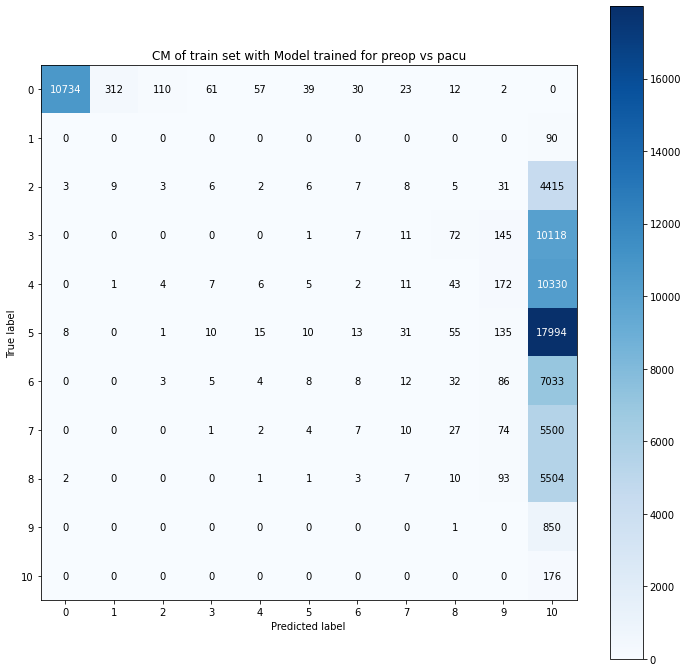

In [7]:
from scikitplot.metrics import plot_confusion_matrix
import tensorflow as tf


x_trains = [x_train[:,:,1:2], agender_train[:]]

# 전체 test 샘플을 한번에 예측
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
with strategy.scope():
    y_pred3 = model5.predict(x_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(y_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with Model trained for preop vs pacu',
    figsize=(12,12))

### test set

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

x_tests = [x_test[:,:,1:2], agender_test[:]]

strategy = tf.distribubbte.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
with strategy.scope():
    # 전체 test 샘플을 한번에 예측
    y_pred3 = model5.predict(x_tests).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_test_label3 = np.array(y_test)

plot_confusion_matrix(
    y_test_label3, y_pred_label3, title='CM of test set with Model trained for preop vs pacu',
    figsize=(12,12))

# Model 3 (LSTM) - train, test: pacu+preop

## Input loading

In [ ]:
import pandas as pd


print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = '../DL_model/dataset/preprocess4/welch3/'
wx_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
wx_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
wx_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']

wy_train = np.load(input_path+'y_train.npz')['arr_0']
wy_test = np.load(input_path+'y_test.npz')['arr_0']
wy_val = np.load(input_path+'y_val.npz')['arr_0']
print('done', flush=True)


# pacu
wtrain_pacu = 63526
wval_pacu = 6724
wtest_pacu = 7497
wx_train_pacu = wx_train[:wtrain_pacu,:,:]
wx_val_pacu = wx_val[:wval_pacu,:,:]
wx_test_pacu = wx_test[:wtest_pacu,:,:]

wy_train_pacu = wy_train[:wtrain_pacu]
wy_val_pacu = wy_val[:wval_pacu]
wy_test_pacu = wy_test[:wtest_pacu]

wy_train_preop = wy_train[wtrain_pacu:]
wy_val_preop = wy_val[wval_pacu:]
wy_test_preop = wy_test[wtest_pacu:]


print('x_train shape:', wx_train.shape)
print('x_val.shape:', wx_val.shape)
print('x_test.shape:', wx_test.shape)
print('x_test pacu.shape:', wx_test_pacu.shape)

In [141]:
import pandas as pd


print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = '../DL_model/dataset/preprocess4/welch3/'
wx_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
wx_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
wx_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']

wy_train = np.load(input_path+'y_train.npz')['arr_0']
wy_test = np.load(input_path+'y_test.npz')['arr_0']
wy_val = np.load(input_path+'y_val.npz')['arr_0']
print('done', flush=True)

loading train...done


In [143]:
len(wx_train), len(wx_test), len(wx_val)

(74636, 8795, 7955)

## Model loading

In [144]:
from keras.models import model_from_json


load_path = 'LSTM_ECG/NRS>=4_welch3/LSTM_3layers_sample-weighted_3class_age+gender'
load_path+='/roc0.7206_prc0.8054_lstm_batch=1024,unit8,unit4,unit32,dropout=0.3,dnodes=0,dropout=0_acc0.77'
load_weight_path = load_path+'/weights.hdf5'

print('loading model...', flush=True, end='')
with open(load_path+"/model.json", 'r') as f_json:
    loaded_model_json = f_json.read()
model_lstm = model_from_json(loaded_model_json)
print('done')
print('loading weights...', flush=True, end='')
model_lstm.load_weights(load_weight_path)
print('done')

loading model...done
loading weights...done


## Model evaluation

### Train

<AxesSubplot:title={'center':'CM of train set with LSTM model trained with pacu+preop'}, xlabel='Predicted label', ylabel='True label'>

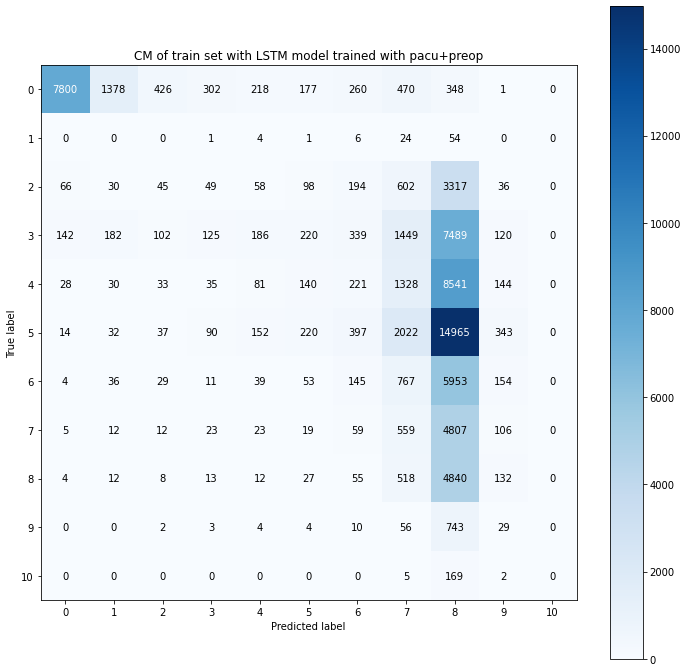

In [148]:
from scikitplot.metrics import plot_confusion_matrix

wx_trains = [wx_train[:,:,:,1], agender_train[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model_lstm.predict(wx_trains).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_train_label3 = np.array(wy_train)

plot_confusion_matrix(
    y_train_label3, y_pred_label3, title='CM of train set with LSTM model trained with pacu+preop',
    figsize=(12,12))

### Test

<AxesSubplot:title={'center':'CM of test set with LSTM model trained with pacu+preop'}, xlabel='Predicted label', ylabel='True label'>

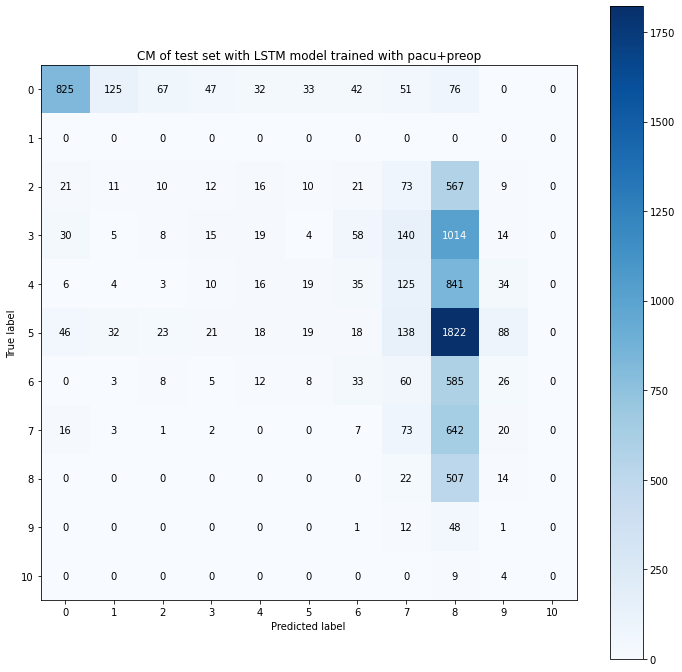

In [150]:
from scikitplot.metrics import plot_confusion_matrix

wx_tests = [wx_test[:,:,:,1], agender_test[:]]
# 전체 test 샘플을 한번에 예측
y_pred3 = model_lstm.predict(wx_tests).flatten()

# labels for NRS 0 ~ 10
labels = []
for i in range(11):
    label = [0]*11
    label[i] = 1
    labels.append(label)

y_pred_label3 = np.array([int(round(y_pr/0.1)) for y_pr in y_pred3])
y_test_label3 = np.array(wy_test)

plot_confusion_matrix(
    y_test_label3, y_pred_label3, title='CM of test set with LSTM model trained with pacu+preop',
    figsize=(12,12))

In [ ]:
from keras.models import model_from_json
import os


model_dir = '1D-CNN_age+gender/ECG/pacu/regression/1D_CNN_3layers_train_w_samp3_lowess_filtered'
#load_path+='/mae0.1358_auc0.5915_batch=512,c1=256,c2=64,c3=256,filt1=3,filt2=5,filt3=3,str1=1,str2=1,str3=2,conv_double=False,globalpool=max,dropout=0.3,dnodes=32,dropout=0.2,dnodes=16,dropout=0.4'


for file in os.listdir(model_dir):
    load_path = os.path.join(model_dir, file)
    load_weight_path = load_path+'/weights.hdf5'

    print('loading model...', flush=True, end='')
    with open(load_path+"/model.json", 'r') as f_json:
        loaded_model_json = f_json.read()
    model = model_from_json(loaded_model_json)
    print('done')
    print('loading weights...', flush=True, end='')
    model.load_weights(load_weight_path)
    print('done')
    
    